In [1]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb # XGBoost stuff
import catboost as cb
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score


In [2]:
def dataframe_overview(df):
    print("DataFrame info:")
    print("--------------------")
    print(df.info())
    print("\nDescribe DataFrame:")
    print("---------------------------------------------")
    print(df.describe())
    print("\nCount(Distinct):")
    print("-------------------------")
    print(df.nunique())
    print(f"\nNumber of observations: {df.shape[0]}")
    print("\nData Types:")
    print("-----------")
    print(df.dtypes)
    ##titanic_df_train.isna().sum()
    print("\nIsNASum:")
    print("-----------")
    print(df.isna().sum())


In [3]:
heartkagglefile = "D:\\Downloads\\heart.csv"

heartdf=pd.read_csv(heartkagglefile, sep=',', header = 0) 

In [4]:
dataframe_overview(heartdf)

DataFrame info:
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Describe DataFrame:
---------------------------------------------
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.

In [4]:
heartdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



# ML Step #3: Data Preparation, Feature Engineering
###### Variable by Variable


#### Ensuring Data Is Tidy
#### Handling Missing Data
#### Label Encoding
#### Transforming Continuous variables
#### Recoding Categorical Variables



In [5]:


heartdf['Sex'] = heartdf['Sex'].map({'F': 0, 'M': 1})


heartdf['Sex'] = heartdf['Sex'].astype(float)





array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

array(['Normal', 'ST', 'LVH'], dtype=object)

array(['N', 'Y'], dtype=object)

array(['Up', 'Flat', 'Down'], dtype=object)

In [6]:
heartdfencoded = pd.get_dummies(heartdf, columns=['ChestPainType', 
                                       'RestingECG', 
                                       'ExerciseAngina', 
                                       'ST_Slope'])
heartdfencoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1.0,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0.0,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1.0,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0.0,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1.0,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [7]:
X = heartdfencoded.drop('HeartDisease', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
X.head()


y = heartdfencoded['HeartDisease'].copy()
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [8]:
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,0,172,0.0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,F,160,180,0,156,1.0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,M,130,283,0,98,0.0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,F,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,1,0
4,54,M,150,195,0,122,0.0,0,0,1,0,0,1,0,1,0,0,0,1


### Last Data Preparation Steps

Dropping unused variables
Creating Dummy variables
Scaling variables

Splitting up our Label, or variable that we are predicting, and the rest of our feature variables

In [15]:
y.dtypes

dtype('int64')

# ML Step #4:  Model Selection

### XGBoost, ADABoost, Random Forest, SVM, Voting Classifer








# ML Step #5-7:  Model Training, Parameter Tuning, Model Evaluation

### XGBoost


In [15]:
len(X_train)

688

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            seed=42, 
                            use_label_encoder=False)
## NOTE: newer versions of XGBoost will issue a warning if you don't explitly tell it that
## you are not expecting it to do label encoding on its own (in other words, since we
## have ensured that the categorical values are all numeric, we do not expect XGBoost to do label encoding), 
## so we set use_label_encoder=False

clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

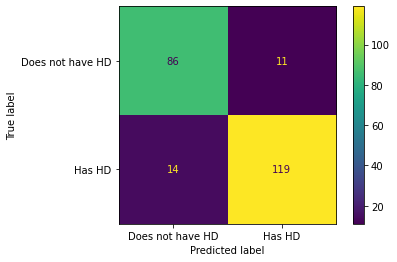

In [20]:
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In [21]:
from sklearn.metrics import accuracy_score

y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8913043478260869


In [22]:
## NOTE: This code takes a few minutes to run, so I've commented it out.
## Since I set seed=42, we'll get the same results anyway, and those are
## coded into the next section...

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': range(50, 250, 50),
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0, 100.0]
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric="logloss", seed=77, use_label_encoder=False),
    param_grid=param_grid,
#     scoring = 'roc_auc',## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 1.0}


In [16]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids a warning...
                        gamma=0,
                        learning_rate=0.1,
                        max_depth=8,
                        n_estimators=100,
                        reg_lambda=10,
                        use_label_encoder=False)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

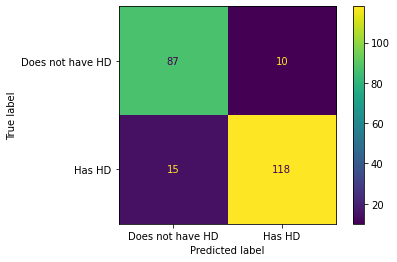

In [25]:
clf_xgb = xgb.XGBClassifier(seed=77,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids a warning...
                        gamma=0.5,
                        learning_rate=0.05,
                        max_depth=3,
                        n_estimators=200,
                        reg_lambda=1,
                        use_label_encoder=False)
clf_xgb.fit(X_train, y_train)
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

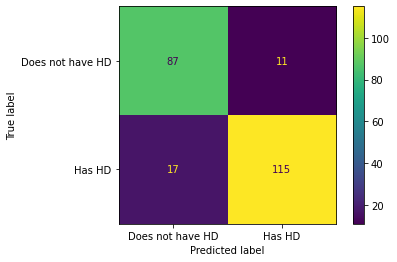

In [17]:

clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            gamma=1,
                            learning_rate=0.1,
                            max_depth=8,
                            n_estimators=100, ## We set this to 1 so we can get gain, cover etc.
                            reg_lambda=10,
                            use_label_encoder=False)
clf_xgb.fit(X_train, y_train)




plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In [24]:
from sklearn.metrics import accuracy_score

y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8913043478260869


There is no layout engine support for "dot"
Perhaps "dot -c" needs to be run (with installer's privileges) to register the plugins?


weight:  {'Age': 70.0, 'Sex': 52.0, 'RestingBP': 96.0, 'Cholesterol': 107.0, 'FastingBS': 40.0, 'MaxHR': 146.0, 'Oldpeak': 149.0, 'ChestPainType_ASY': 38.0, 'ChestPainType_ATA': 6.0, 'ChestPainType_NAP': 4.0, 'ChestPainType_TA': 4.0, 'RestingECG_LVH': 13.0, 'RestingECG_ST': 12.0, 'ExerciseAngina_N': 28.0, 'ST_Slope_Down': 5.0, 'ST_Slope_Flat': 40.0, 'ST_Slope_Up': 16.0}
gain:  {'Age': 1.3646671772003174, 'Sex': 3.352337121963501, 'RestingBP': 1.3823022842407227, 'Cholesterol': 2.8078224658966064, 'FastingBS': 1.7822792530059814, 'MaxHR': 1.3949989080429077, 'Oldpeak': 2.0665533542633057, 'ChestPainType_ASY': 6.9808030128479, 'ChestPainType_ATA': 1.233174204826355, 'ChestPainType_NAP': 0.9975769519805908, 'ChestPainType_TA': 0.7063803672790527, 'RestingECG_LVH': 1.3398182392120361, 'RestingECG_ST': 1.1310279369354248, 'ExerciseAngina_N': 7.958111763000488, 'ST_Slope_Down': 1.3399937152862549, 'ST_Slope_Flat': 3.273331880569458, 'ST_Slope_Up': 92.15843963623047}
cover:  {'Age': 26.959564

CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tsvg']' returned non-zero exit status 1. [stderr: 'There is no layout engine support for "dot"\nPerhaps "dot -c" needs to be run (with installer\'s privileges) to register the plugins?\n']

In [23]:
accuracy =[]
model_names =[]


X= heartdf.drop('HeartDisease', axis=1)
y= heartdf['HeartDisease']
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = cb.CatBoostClassifier(verbose=False,random_state=0)

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
##accuracy.append(round(accuracy_score(y_test, y_pred),4))




<ipython-input-23-e7276c1e7cd6>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X.dtypes != np.float)[0]


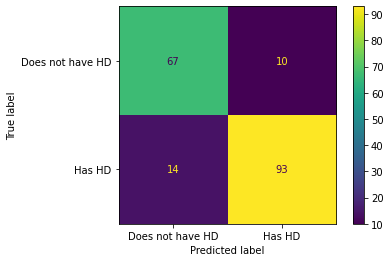

In [24]:

plot_confusion_matrix(model, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

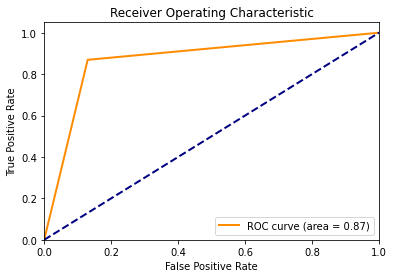

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
accuracy =[]
model_names =[]


X = heartdfencoded.drop('HeartDisease', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]


y = heartdfencoded['HeartDisease'].copy()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
ab_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the individual classifiers
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
ab_clf.fit(X_train, y_train)




voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf), ('ab', ab_clf)],
    voting='hard'
)

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)


# Make predictions
rf_pred = rf_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)
ab_pred = ab_clf.predict(X_test)
voting_pred = voting_clf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("AdaBoost Accuracy:", accuracy_score(y_test, ab_pred))
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))

Random Forest Accuracy: 0.8858695652173914
Gradient Boosting Accuracy: 0.875
AdaBoost Accuracy: 0.8586956521739131
Voting Classifier Accuracy: 0.875


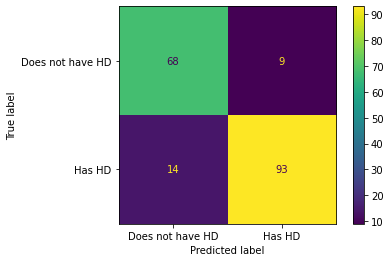

In [33]:

plot_confusion_matrix(voting_clf, X_test, y_test, display_labels=["Does not have HD", "Has HD"])